In [627]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [628]:
df_credit=pd.read_csv("dataset/credit_profiles.csv")
df_cust=pd.read_csv("dataset/customers.csv")
df_trans=pd.read_csv("dataset/transactions.csv")

In [629]:
print("credit data",df_credit.shape)
print("customer_data",df_cust.shape)
print("transaction data",df_trans.shape)

credit data (1004, 6)
customer_data (1000, 8)
transaction data (500000, 7)


<h1 style="color:purple" align="center">Explore Customers Table<h1>


In [630]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married


In [631]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


<h1 style="color:white" align="center">Analyze annual income<h1>

find out the annual income which is null and replace it with their corrosponding median occupation

In [632]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [633]:
df_cust[df_cust.annual_income.isna()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Isha Arora,Female,25,Rural,Artist,NaN,Married
82,83,Sanjana Singhal,Male,27,City,Freelancer,NaN,Single
97,98,Sia Batra,Male,47,Suburb,Business Owner,NaN,Married
102,103,Pooja Ganguly,Male,32,City,Data Scientist,NaN,Married
155,156,Krishna Trivedi,Male,24,City,Fullstack Developer,NaN,Married


In [634]:
occupation_wise_annaul_median=df_cust.groupby("occupation")["annual_income"].median()
occupation_wise_annaul_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [635]:
# 2. Replace null values in annual_income with the median income of their occupation group
df_cust['annual_income'] = df_cust.apply(
    lambda row: occupation_wise_annaul_median[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'],
    axis=1
)

In [636]:
df_cust.isna().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

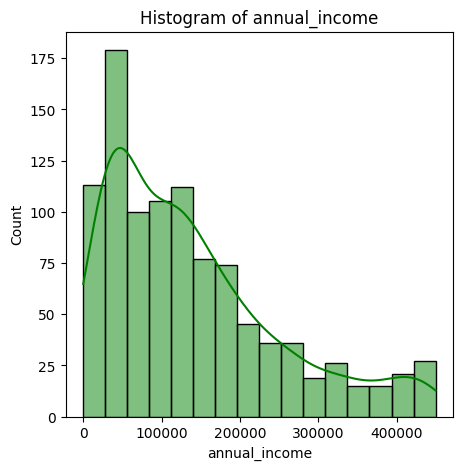

In [637]:
plt.figure(figsize=(5, 5))
sns.histplot(df_cust['annual_income'], kde=True, color='green', label='Data')
plt.title('Histogram of annual_income')
plt.show()

In [638]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


We have following observations from the above,

1. **Age**: min = 1, max = 135
1. **Annual Income**: min = 2, max = 447 k

Age column has outliers. Annual income also seem to have outliers in terms of minimum value because business suggested that minimum income should be atleast 100

In [639]:
df_cust.annual_income.describe()

count      1000.000000
mean     138916.765500
std      110969.408643
min           2.000000
25%       48229.500000
50%      113416.000000
75%      192614.000000
max      449346.000000
Name: annual_income, dtype: float64

In [640]:
lower=df_cust["annual_income"].mean()-3*df_cust["annual_income"].std()
upper=df_cust["annual_income"].mean()+3*df_cust["annual_income"].std()
lower,upper

(np.float64(-193991.4604300989), np.float64(471824.9914300989))

In [641]:
df_cust_outlier=df_cust[(df_cust["annual_income"]>lower) & (df_cust["annual_income"]<upper)]
df_cust_outlier

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married
...,...,...,...,...,...,...,...,...
995,996,Advait Rana,Female,26,City,Freelancer,46759.0,Married
996,997,Sia Chatterjee,Male,55,City,Business Owner,290061.0,Single
997,998,Amara Tiwari,Male,29,City,Fullstack Developer,139141.0,Married
998,999,Aanya Malhotra,Female,47,City,Business Owner,261191.5,Married


### Outlier Treatment: Annual income

Above records (with <100$ income) are outliers. We have following options to treat them,

1. **Remove them**: After discussion with business, we decided not to remove them as these are valid customers and we want to include them in our analysis
1. **Replace them with mean or median** : Mean is sensitive to outliers. It is better to use median for income values
1. **Replace them with occupation wise median**: Income level may vary based on occupation. For example median income for data scientist can be different from a median income of a business owner. It is better to use occupation wise median income for replacement


In [642]:
int(occupation_wise_annaul_median["Artist"])

45794

In [643]:
for index,row in df_cust.iterrows():
    if row["annual_income"]<100:
        occupation=df_cust.at[index,"occupation"]
        df_cust.at[index,"annual_income"]=occupation_wise_annaul_median[occupation]


In [644]:
df_cust[df_cust["annual_income"]<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [645]:
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married
...,...,...,...,...,...,...,...,...
995,996,Advait Rana,Female,26,City,Freelancer,46759.0,Married
996,997,Sia Chatterjee,Male,55,City,Business Owner,290061.0,Single
997,998,Amara Tiwari,Male,29,City,Fullstack Developer,139141.0,Married
998,999,Aanya Malhotra,Female,47,City,Business Owner,261191.5,Married


In [646]:
avg_income=df_cust.groupby("occupation")["annual_income"].mean()
avg_income
avg_income.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/2168881984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income.index,y=avg_income.values, palette='tab10')


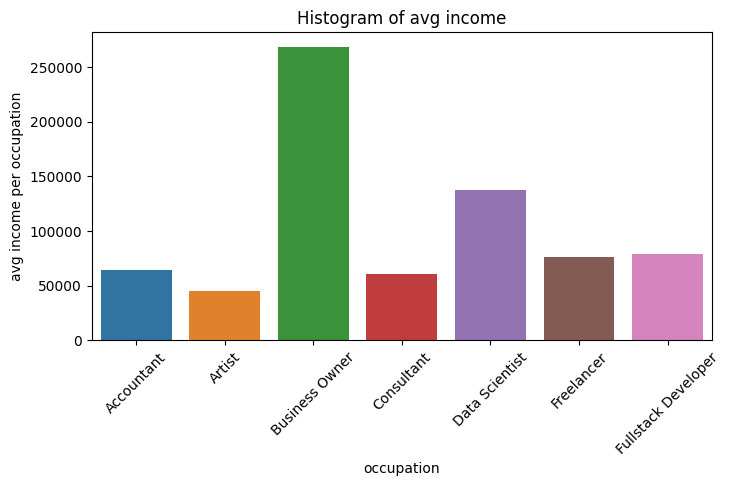

In [647]:
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_income.index,y=avg_income.values, palette='tab10')
plt.xticks(rotation=45)
plt.title('Histogram of avg income')
plt.ylabel("avg income per occupation")
plt.xlabel("occupation")
plt.show()

/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/1790311944.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/1790311944.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/1790311944.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/1790311944.py:19

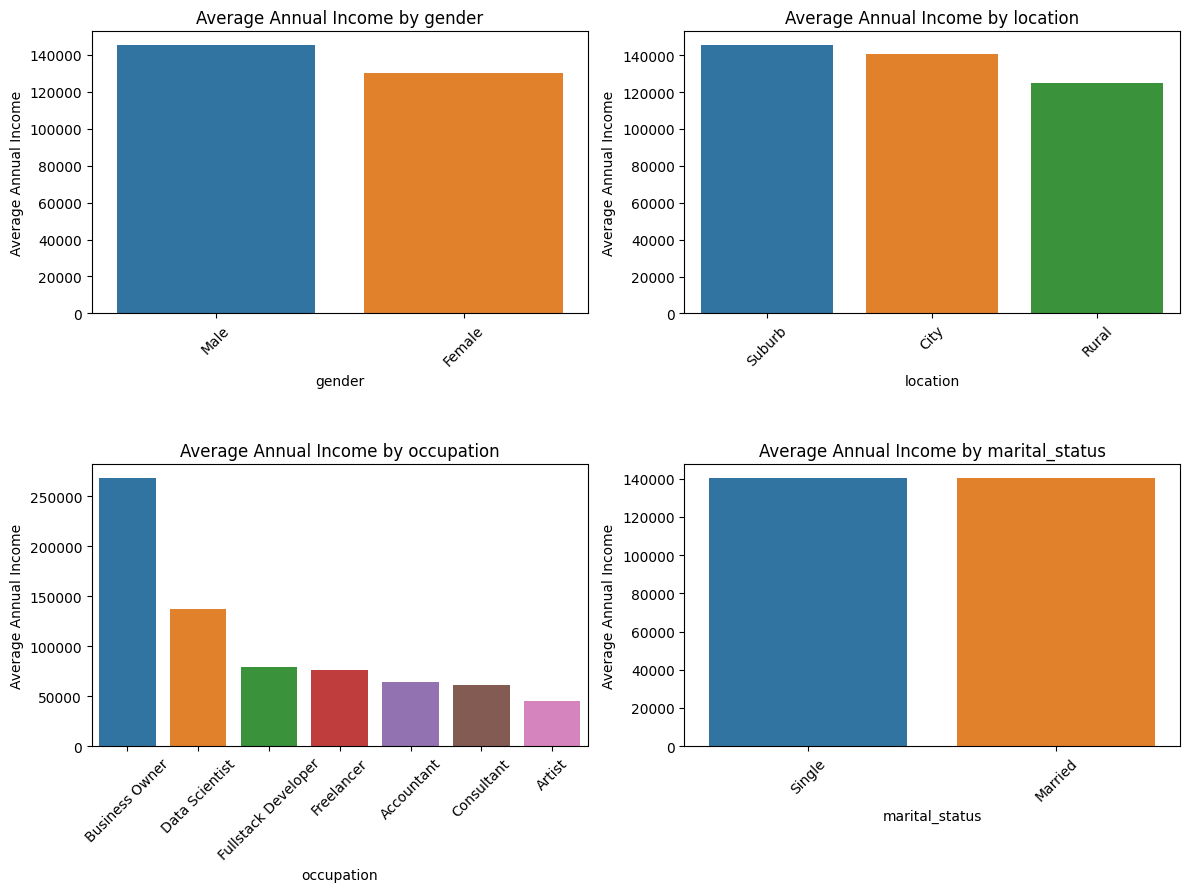

In [648]:
# List of categorical columns
cat_cols = ['gender', 'location', 'occupation', 'marital_status']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_income_by_category = df_cust.groupby(cat_col)['annual_income'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_income_by_category.sort_values(by='annual_income', ascending=False)
    
    sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average Annual Income by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Annual Income')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [649]:
df_cust.age.isnull().sum()

np.int64(0)

In [650]:
df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

### Outlier Treatment: Age

Above we see that min age is 1 and max age is 135. These seem to be outliers. So let's find out age distribution.

In [651]:
min_age=df_cust.age.min()
max_age=df_cust.age.max()

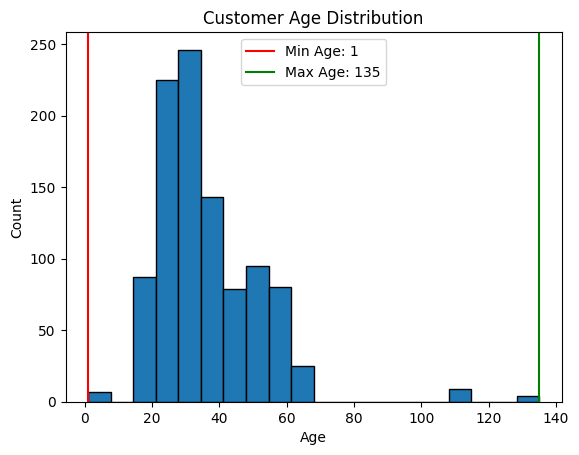

In [652]:
plt.hist(df_cust.age, bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Customer Age Distribution")

plt.axvline(min_age, color="red", label=f"Min Age: {min_age}")
plt.axvline(max_age, color="green", label=f"Max Age: {max_age}")

plt.legend()
plt.show()

In [653]:
df_cust[(df_cust.age >15) & (df_cust.age<80)]


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married
5,6,Aditi Kaul,Male,22,City,Freelancer,44887.0,Married
...,...,...,...,...,...,...,...,...
995,996,Advait Rana,Female,26,City,Freelancer,46759.0,Married
996,997,Sia Chatterjee,Male,55,City,Business Owner,290061.0,Single
997,998,Amara Tiwari,Male,29,City,Fullstack Developer,139141.0,Married
998,999,Aanya Malhotra,Female,47,City,Business Owner,261191.5,Married


In [654]:
df_avg_age = df_cust.groupby("occupation")["age"].mean()

In [655]:
df_avg_age

occupation
Accountant             34.812500
Artist                 28.236842
Business Owner         49.740484
Consultant             45.680412
Data Scientist         33.157609
Freelancer             25.184211
Fullstack Developer    27.878378
Name: age, dtype: float64

In [656]:
df_avg_age["Accountant"]

np.float64(34.8125)

In [657]:
for index,row in df_cust.iterrows():
    if row["age"]<15 or row["age"]>80:
        age=df_cust.at[index,"occupation"]
        df_cust.at[index,"age"]=df_avg_age[age]

/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/725006942.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '49.740484429065745' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cust.at[index,"age"]=df_avg_age[age]


In [658]:
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,49.740484,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47.000000,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21.000000,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24.000000,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48.000000,City,Consultant,39406.0,Married
...,...,...,...,...,...,...,...,...
995,996,Advait Rana,Female,26.000000,City,Freelancer,46759.0,Married
996,997,Sia Chatterjee,Male,55.000000,City,Business Owner,290061.0,Single
997,998,Amara Tiwari,Male,29.000000,City,Fullstack Developer,139141.0,Married
998,999,Aanya Malhotra,Female,47.000000,City,Business Owner,261191.5,Married


In [659]:
df_cust.age.describe()

count    1000.000000
mean       35.555240
std        12.259532
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

In [660]:
new_min_age=df_cust.age.min()
new_max_age=df_cust.age.max()
new_min_age,new_max_age

(np.float64(18.0), np.float64(64.0))

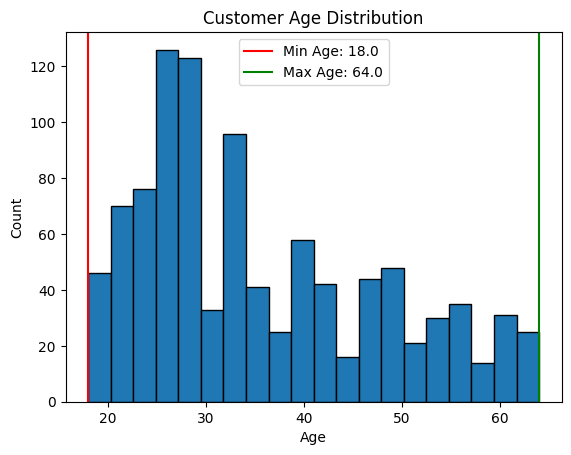

In [661]:
plt.hist(df_cust.age, bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Customer Age Distribution")

plt.axvline(new_min_age, color="red", label=f"Min Age: {new_min_age}")
plt.axvline(new_max_age, color="green", label=f"Max Age: {new_max_age}")

plt.legend()
plt.show()

In [662]:
bin_edges=[17,25,48,65]
bin_lables=['18-25','26-48','49-65']
pd.cut(df_cust["age"],bins=bin_edges,labels=bin_lables)

0      49-65
1      26-48
2      18-25
3      18-25
4      26-48
       ...  
995    26-48
996    49-65
997    26-48
998    26-48
999    26-48
Name: age, Length: 1000, dtype: category
Categories (3, object): ['18-25' < '26-48' < '49-65']

In [663]:
df_cust["age_group"]=pd.cut(df_cust["age"],bins=bin_edges,labels=bin_lables)
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,49.740484,City,Business Owner,358211.0,Married,49-65
1,2,Kabir Thakur,Female,47.000000,City,Consultant,65172.0,Single,26-48
2,3,Kriti Mangal,Male,21.000000,City,Freelancer,22378.0,Married,18-25
3,4,Sara Dwivedi,Male,24.000000,Rural,Freelancer,33563.0,Married,18-25
4,5,Aarohi Negi,Male,48.000000,City,Consultant,39406.0,Married,26-48
...,...,...,...,...,...,...,...,...,...
995,996,Advait Rana,Female,26.000000,City,Freelancer,46759.0,Married,26-48
996,997,Sia Chatterjee,Male,55.000000,City,Business Owner,290061.0,Single,49-65
997,998,Amara Tiwari,Male,29.000000,City,Fullstack Developer,139141.0,Married,26-48
998,999,Aanya Malhotra,Female,47.000000,City,Business Owner,261191.5,Married,26-48


In [664]:
df_cust["age_group"].value_counts(normalize=True)*100

age_group
26-48    57.3
18-25    24.0
49-65    18.7
Name: proportion, dtype: float64

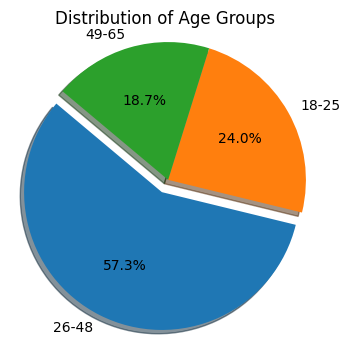

In [665]:
# Calculate the count of values in each age group
age_group_counts = df_cust['age_group'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    age_group_counts, 
    labels=age_group_counts.index, 
    explode=(0.1,0,0), 
    autopct='%1.1f%%', 
    shadow=True,
    startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Age Groups')
plt.show()

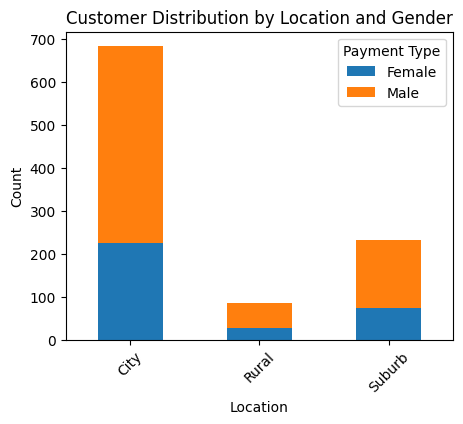

In [666]:
customer_location_gender = df_cust.groupby(['location', 'gender']).size().unstack(fill_value=0)

# Create a stacked bar chart to visualize the distribution of payment types for each occupation
customer_location_gender.plot(kind='bar', stacked=True, figsize=(5, 4))

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Customer Distribution by Location and Gender')

# Show the bar chart
plt.legend(title='Payment Type', bbox_to_anchor=(1, 1))  # Add a legend

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

<h1 style="color:purple" align="center">Explore Credit Score Table<h1>

In [667]:
df_credit.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [668]:
df_credit.shape

(1004, 6)

In [669]:
df_credit["cust_id"].nunique()

1000

In [670]:
df_credit[df_credit.duplicated('cust_id',keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [671]:
df_credit_clean1=df_credit.drop_duplicates(subset='cust_id',keep='last')
df_credit_clean1.shape

(1000, 6)

In [672]:
df_credit_clean1[df_credit_clean1.duplicated('cust_id',keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


df_cs_clean_1 looks clean now after cleaning duplicates.

Next step would be to see if there are any null values

### Data Cleaning Step 2: Handle Null Values

In [673]:
df_credit_clean1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

Ahh... look at credit_limit. It has a bunch of null values. we need to clean them up! From the business knowledge we know that credit limit depends on credit score of a customer. We will try to find out if we can figure out a mathematical relationship between credit score and credit limit and use credit score to full NULL values in credit limit. Let's explore a few things here!

In [674]:
df_credit_clean1[df_credit_clean1.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [675]:
df_credit_clean1['credit_limit'].unique()

array([40000.,  1250.,  1000.,   500.,   750.,    nan,  1500., 60000.,
       20000.])

Credit limit has only few unique values. Let's check the count for each of these unique values

In [676]:
df_credit_clean1['credit_limit'].value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

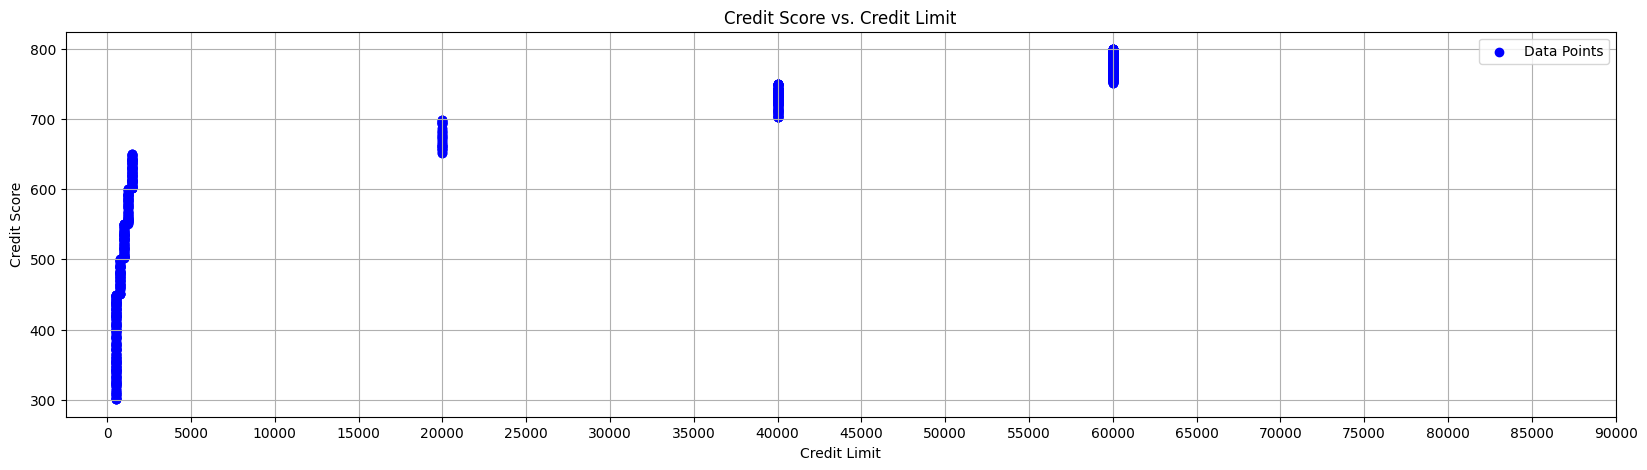

In [677]:
# Looking at scatter plot for credit score vs credit_limit again (after handling oultiers)
# Create a scatter plot
plt.figure(figsize=(20, 5))
plt.scatter(df_credit_clean1['credit_limit'], df_credit_clean1['credit_score'], c='blue', marker='o', label='Data Points')

# Customize the plot
plt.title('Credit Score vs. Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')

# Adjust the y-axis bin interval to 1000
plt.xticks(range(0, 90001, 5000))
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

Here we can see clear relationship between credit score and credit limit. Where there are levels for example, upto 650 score is getting a very minor credit limit (<1000$) where as a score between 650 to 700 is getting around 20000. Score between 700 to 750 is getting around 40K etc.

In [678]:
# Define bin ranges
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]

# Create labels for the bins
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]

# Use pd.cut to assign data to bins
df_credit_clean1['credit_score_range'] = pd.cut(df_credit_clean1['credit_score'], bins=bin_ranges, labels=bin_labels, include_lowest=True, right=False)

/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/1399595237.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit_clean1['credit_score_range'] = pd.cut(df_credit_clean1['credit_score'], bins=bin_ranges, labels=bin_labels, include_lowest=True, right=False)


In [679]:
df_credit_clean1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [680]:
df_credit_clean1[df_credit_clean1["credit_score_range"]=="700-749"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
6,7,747,0.523965,15544.0,4.0,40000.0,700-749
16,17,702,0.894423,18444.0,0.0,40000.0,700-749
27,28,729,0.149748,3453.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-749
970,967,739,0.845474,23929.0,4.0,40000.0,700-749
991,988,739,0.435891,9283.0,4.0,40000.0,700-749
994,991,709,0.718484,15473.0,4.0,40000.0,700-749


In [681]:
df_credit_clean1[df_credit_clean1["credit_score_range"]=="300-449"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
5,6,442,0.705409,246.0,4.0,500.0,300-449
11,12,429,0.627645,263.0,0.0,500.0,300-449
15,16,347,0.531660,190.0,0.0,500.0,300-449
18,19,447,0.795650,292.0,1.0,500.0,300-449
20,21,381,0.714710,307.0,0.0,500.0,300-449
...,...,...,...,...,...,...,...
981,978,371,0.435307,183.0,2.0,500.0,300-449
982,979,332,0.150815,65.0,1.0,500.0,300-449
984,981,327,0.377202,108.0,3.0,500.0,300-449
989,986,425,0.178470,56.0,4.0,500.0,300-449


Above you can see that for credit score range "750-799" the credit limit is 60K whereas for "300-449" it is 500. We can use MODE function to find out most frequently occuring credit limit for a given score range.

In [682]:
mode_df=df_credit_clean1.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_df

/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/2241681371.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_df=df_credit_clean1.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()


,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [683]:
df_credit_clean1[df_credit_clean1.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
957,954,783,0.867421,46451.0,0.0,NaN,750-799
467,468,354,0.892740,231.0,2.0,NaN,300-449
729,726,737,0.136048,205404.0,4.0,NaN,700-749


In [684]:
# Merge the mode values back with the original DataFrame
df_credit_clean2 = pd.merge(df_credit_clean1, mode_df, on='credit_score_range', suffixes=('', '_mode'))
df_credit_clean2.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
620,621,611,0.787348,598.0,3.0,1500.0,600-649,1500.0
348,349,341,0.759786,239.0,2.0,500.0,300-449,500.0
804,805,766,0.880722,39260.0,2.0,60000.0,750-799,60000.0


In [685]:
df_credit_clean2[df_credit_clean2.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
676,677,300,0.785509,341.0,1.0,NaN,300-449,500.0
852,853,497,0.873269,416.0,3.0,NaN,450-499,750.0
83,84,733,0.525567,16663.0,1.0,NaN,700-749,40000.0


Above we can simple replace NaN value in credit_limit column with credit_limit_mode value. This value indicates most frequently occuring credit limit for a given credit_score_range. Hence it can be used as a replacement value.

We will create a new copy of the dataframe so that we have reproducibility and access of the older dataframe in this notebook

In [686]:
df_credit_clean3=df_credit_clean2.copy()
df_credit_clean3['credit_limit'].fillna(df_credit_clean3['credit_limit_mode'],inplace=True)
df_credit_clean3.shape

/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/1601943893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_credit_clean3['credit_limit'].fillna(df_credit_clean3['credit_limit_mode'],inplace=True)


(1000, 8)

In [687]:
df_credit_clean3.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

You can now see ZERO outliers in credit_limit column which means we successfully got rid of all NULL values. 

### Data Cleaning Step 3: Handle Outliers: outstanding_debt

In [688]:
df_credit_clean3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


When we observe min and max for various columns, we realize that outstanding_debt's max is greater than the max of credit_limit. Based on the business understanding, we know that the maximum debt that a customer can have is equal to credit limit. They would not be allowed to spend more than their credit limit. Let's see how many such cases are present in our dataset

Text(0.5, 1.0, 'Box plot for outstanding debt')

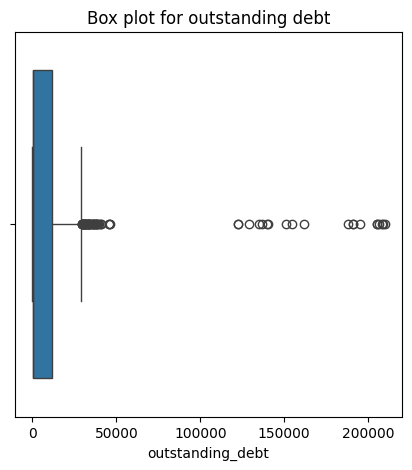

In [689]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=df_credit_clean3['outstanding_debt'])
plt.title('Box plot for outstanding debt')

Instead of using any statistical approach (such as standard deviation or IQR), here too we will use a business knowledge. We will mark any outstanding debt that is greater than credit limit as an outlier

In [690]:
df_credit_clean3[df_credit_clean3.outstanding_debt>df_credit_clean3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


In [691]:
df_credit_clean3.loc[df_credit_clean3['outstanding_debt'] > df_credit_clean3['credit_limit'], 'outstanding_debt']

1      161644.0
19     205014.0
25     190838.0
38     122758.0
93     137058.0
204    187849.0
271    154568.0
301    122402.0
330    208898.0
350    150860.0
446    206191.0
544    135112.0
636    140063.0
646    128818.0
698    190717.0
723    140008.0
725    205404.0
730    209901.0
766    195004.0
862    208406.0
Name: outstanding_debt, dtype: float64

In [692]:
df_credit_clean3.loc[df_credit_clean3['outstanding_debt'] > df_credit_clean3['credit_limit'], 'outstanding_debt']=df_credit_clean3['credit_limit']

In [693]:
df_credit_clean3[df_credit_clean3.outstanding_debt>df_credit_clean3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


All outlier for outstanding_debt has been removed

### Data Exploration: Visualizing Correlation in Credit Score Table

In [694]:
df_credit_clean3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,6850.084000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,10683.473561,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,541.500000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,10924.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,60000.000000,4.000000,60000.00000,60000.000000


In [695]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,49.740484,City,Business Owner,358211.0,Married,49-65
1,2,Kabir Thakur,Female,47.000000,City,Consultant,65172.0,Single,26-48
2,3,Kriti Mangal,Male,21.000000,City,Freelancer,22378.0,Married,18-25
3,4,Sara Dwivedi,Male,24.000000,Rural,Freelancer,33563.0,Married,18-25
4,5,Aarohi Negi,Male,48.000000,City,Consultant,39406.0,Married,26-48


In [696]:
df_credit_clean3.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [697]:
df_merged=df_cust.merge(df_credit_clean3,on='cust_id',how='inner')
df_merged

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Dhruv Bansal,Female,49.740484,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Kabir Thakur,Female,47.000000,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Kriti Mangal,Male,21.000000,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Sara Dwivedi,Male,24.000000,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Aarohi Negi,Male,48.000000,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Advait Rana,Female,26.000000,City,Freelancer,46759.0,Married,26-48,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
996,997,Sia Chatterjee,Male,55.000000,City,Business Owner,290061.0,Single,49-65,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
997,998,Amara Tiwari,Male,29.000000,City,Fullstack Developer,139141.0,Married,26-48,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
998,999,Aanya Malhotra,Female,47.000000,City,Business Owner,261191.5,Married,26-48,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


In [698]:
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income','age']

correlation_matrix = df_merged[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575751,0.444821
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086368,-0.027394
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555661,0.444104
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684775,0.510500
annual_income,0.575751,-0.086368,0.555661,0.684775,1.000000,0.618101
age,0.444821,-0.027394,0.444104,0.510500,0.618101,1.000000


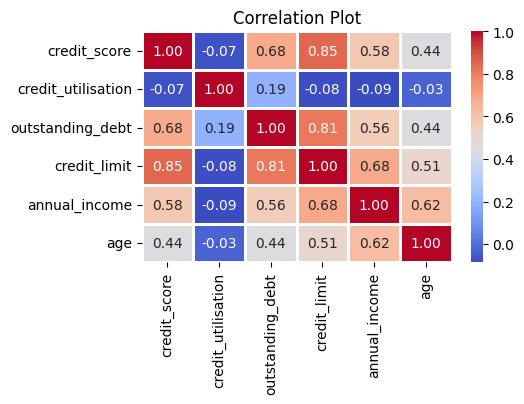

In [699]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.8)
plt.title('Correlation Plot')
plt.show()

You can see a high correlation between credit limit and credit score (~0.85)

Also credit limit and annual income has a high correlation.

This correlation table can be used for further analysis. It shows if one variable has relationship with the other variable

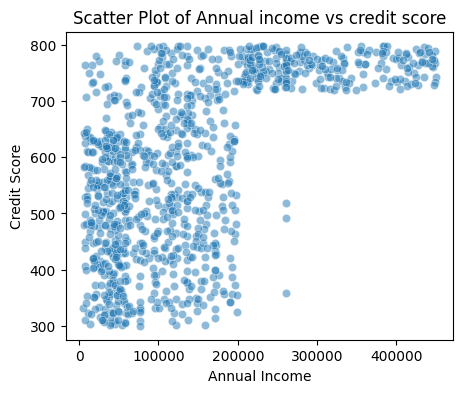

In [700]:
# Just looking if there is any relation between annual_income and credit score
plt.figure(figsize=(5, 4))
sns.scatterplot(x='annual_income', y='credit_score', data=df_merged, alpha=0.5)
plt.title('Scatter Plot of Annual income vs credit score')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.show()

#### NO clear pattern observed

<h1 style="color:purple" align="center">Transactions Table<h1>

In [701]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [702]:
df_trans.shape

(500000, 7)

In [703]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [704]:
df_trans[df_trans.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


<Axes: xlabel='count', ylabel='product_category'>

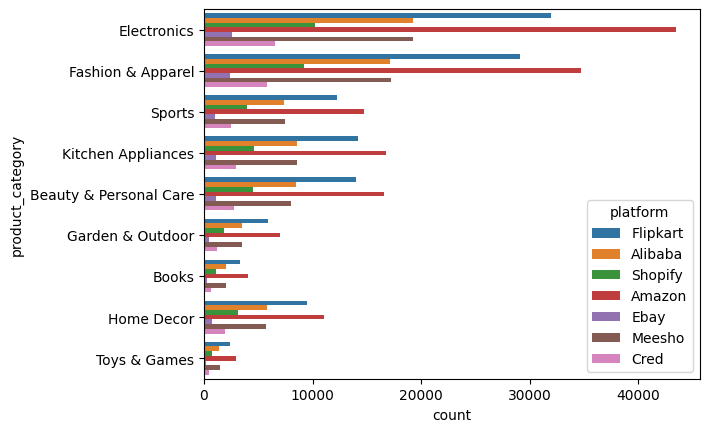

In [705]:
sns.countplot(y='product_category', hue='platform', data=df_trans)

In the above chart, you can see that in all product categories Amazon is the platform that is used the most for making purchases. For handling null values in platform may be we can just replace them using "Amazon" as a product platform just because it is used most frequently

In [707]:
df_trans.platform.mode()

0    Amazon
Name: platform, dtype: object

In [708]:
df_trans.platform.mode()[0]

'Amazon'

In [710]:
df_trans['platform'].fillna(df_trans.platform.mode()[0],inplace=True)

In [711]:
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

Once again we got rid of NULL values

#### Now we can remove the outlier in transcation dataset

In [713]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


We can see transactions with 0 amount. These seem to be invalid

In [716]:
df_trans_zero=df_trans[df_trans.tran_amount==0]
df_trans_zero.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card


In [718]:
df_trans_zero.platform.value_counts()

platform
Amazon    4734
Name: count, dtype: int64

In [719]:
df_trans_zero[['platform','product_category','payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

It appears that when platform=Amazon, product_category=Eletronics and payment_type=Credit Card, at that time we get all these zero transactions. We need to find other transactions in this group and find its median to replace these zero values. We are not using mean because we can see some outliers as well in this column

In [725]:
df_trans_1=df_trans[(df_trans.platform=='Amazon') & (df_trans.product_category=='Electronics') & (df_trans.payment_type=='Credit Card')]
df_trans_1.shape

(15637, 7)

In [726]:
df_trans_1[df_trans_1.tran_amount>0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
263,264,528,2023-01-01,421,Amazon,Electronics,Credit Card
311,312,936,2023-01-01,537,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499766,499767,723,2023-09-05,909,Amazon,Electronics,Credit Card
499793,499794,586,2023-09-05,304,Amazon,Electronics,Credit Card
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card


In [729]:
median_to_replce=df_trans_1[df_trans_1.tran_amount>0].tran_amount.median()
median_to_replce

np.float64(554.0)

In [730]:
df_trans['tran_amount'].replace(0,median_to_replce,inplace=True)

/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/3845594945.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans['tran_amount'].replace(0,median_to_replce,inplace=True)


In [731]:
df_trans[df_trans.tran_amount==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


As you can see above, no zero values are left in tran_amount column

In [732]:
df_trans.tran_amount.describe()

count    500000.000000
mean       3230.452602
std       13097.561071
min           2.000000
25%          66.000000
50%         146.000000
75%         413.000000
max       69999.000000
Name: tran_amount, dtype: float64

In [733]:
df_trans[df_trans.tran_amount<1000].describe()

,tran_id,cust_id,tran_amount
count,475000.000000,475000.000000,475000.000000
mean,250041.699922,501.375499,240.667608
std,144285.259913,288.606185,244.487110
min,1.000000,1.000000,2.000000
25%,125126.750000,252.000000,63.000000
50%,250100.500000,502.000000,131.000000
75%,374928.250000,751.000000,348.000000
max,500000.000000,1000.000000,999.000000


In [734]:
Q1, Q3 = df_trans['tran_amount'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower = Q1 - 2 * IQR
upper = Q3 + 2 * IQR

lower, upper

(-628.0, 1107.0)

In [735]:
df_trans[df_trans.tran_amount<upper].tran_amount.max()

np.int64(999)

In [736]:
df_trans[df_trans.tran_amount>upper].tran_amount.min()

np.int64(50000)

In [737]:
df_trans_outlier=df_trans[df_trans.tran_amount>=upper]
df_trans_outlier

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [738]:
df_trans_normal = df_trans[df_trans.tran_amount<upper]
df_trans_normal

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [742]:
trans_mean_by_category=df_trans_normal.groupby(df_trans_normal['product_category'])['tran_amount'].mean()
trans_mean_by_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [743]:
df_trans.loc[df_trans_outlier.index,'tran_amount']=df_trans_outlier['product_category'].map(trans_mean_by_category)

/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/1730303721.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 92.16720517  50.33329759 176.77328782 ... 269.18163136 269.18163136
  64.55346325]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_trans.loc[df_trans_outlier.index,'tran_amount']=df_trans_outlier['product_category'].map(trans_mean_by_category)


In [745]:
df_trans.loc[df_trans_outlier.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


You can now see that we got rid of outliers from tran_amount column.

<Axes: xlabel='tran_amount', ylabel='Count'>

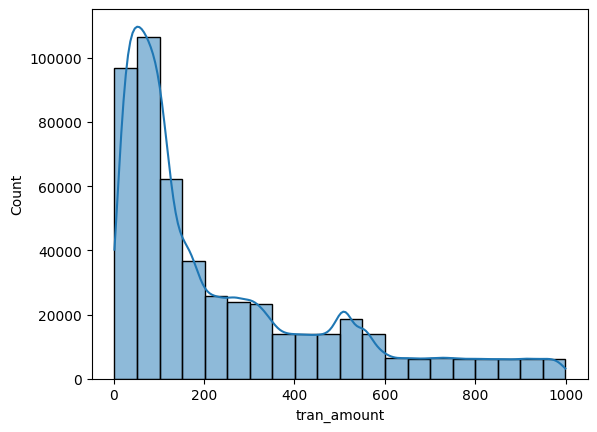

In [746]:
sns.histplot(x='tran_amount', data=df_trans, bins=20, kde=True)

### Data Visualization: Payment Type Distribution

In [747]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


<Axes: xlabel='payment_type', ylabel='percent'>

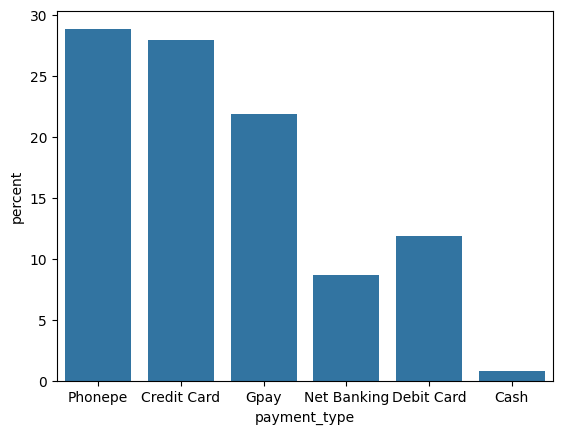

In [748]:
sns.countplot(x=df_trans.payment_type, stat='percent')

In [751]:
df_merged_2=df_merged.merge(df_trans, on='cust_id',how='inner')
df_merged_2.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Dhruv Bansal,Female,49.740484,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Dhruv Bansal,Female,49.740484,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Dhruv Bansal,Female,49.740484,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay


In [752]:
df_merged_2.shape

(500000, 22)

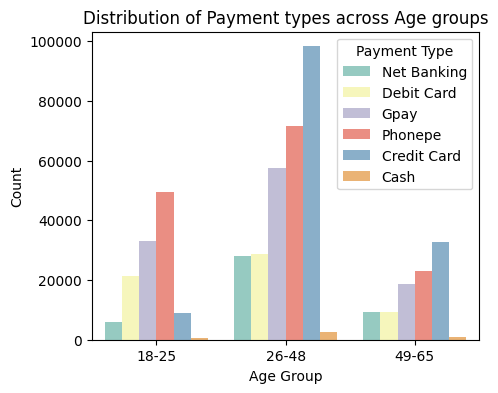

In [753]:
plt.figure(figsize=(5, 4))
sns.countplot(x='age_group', hue='payment_type', data=df_merged_2, palette='Set3')
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Type', loc='upper right')

plt.show()

From above analysis, we can see that age group 18-25 has less exposure to credit cards compared to other groups

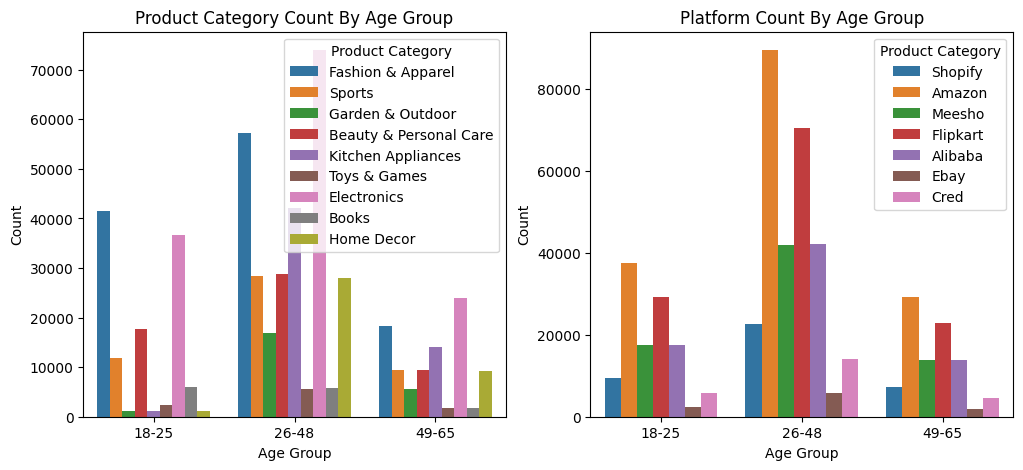

In [754]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='age_group', hue="product_category", data=df_merged_2, ax=ax1)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
ax1.legend(title="Product Category", loc='upper right')

sns.countplot(x='age_group', hue="platform", data=df_merged_2, ax=ax2)
ax2.set_title("Platform Count By Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
ax2.legend(title="Product Category", loc='upper right')

plt.show()

Observations:

1. Top 3 purchasing categories of customers in age group (18 -25) : Electronics, Fashion & Apparel, Beauty & personal care
1. Top platforms : Amazon, Flipkart, Alibaba

### Data Visualization: Average Transaction Amount

/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/1071203157.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/1071203157.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/1071203157.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/1071203157.py:19: Fu

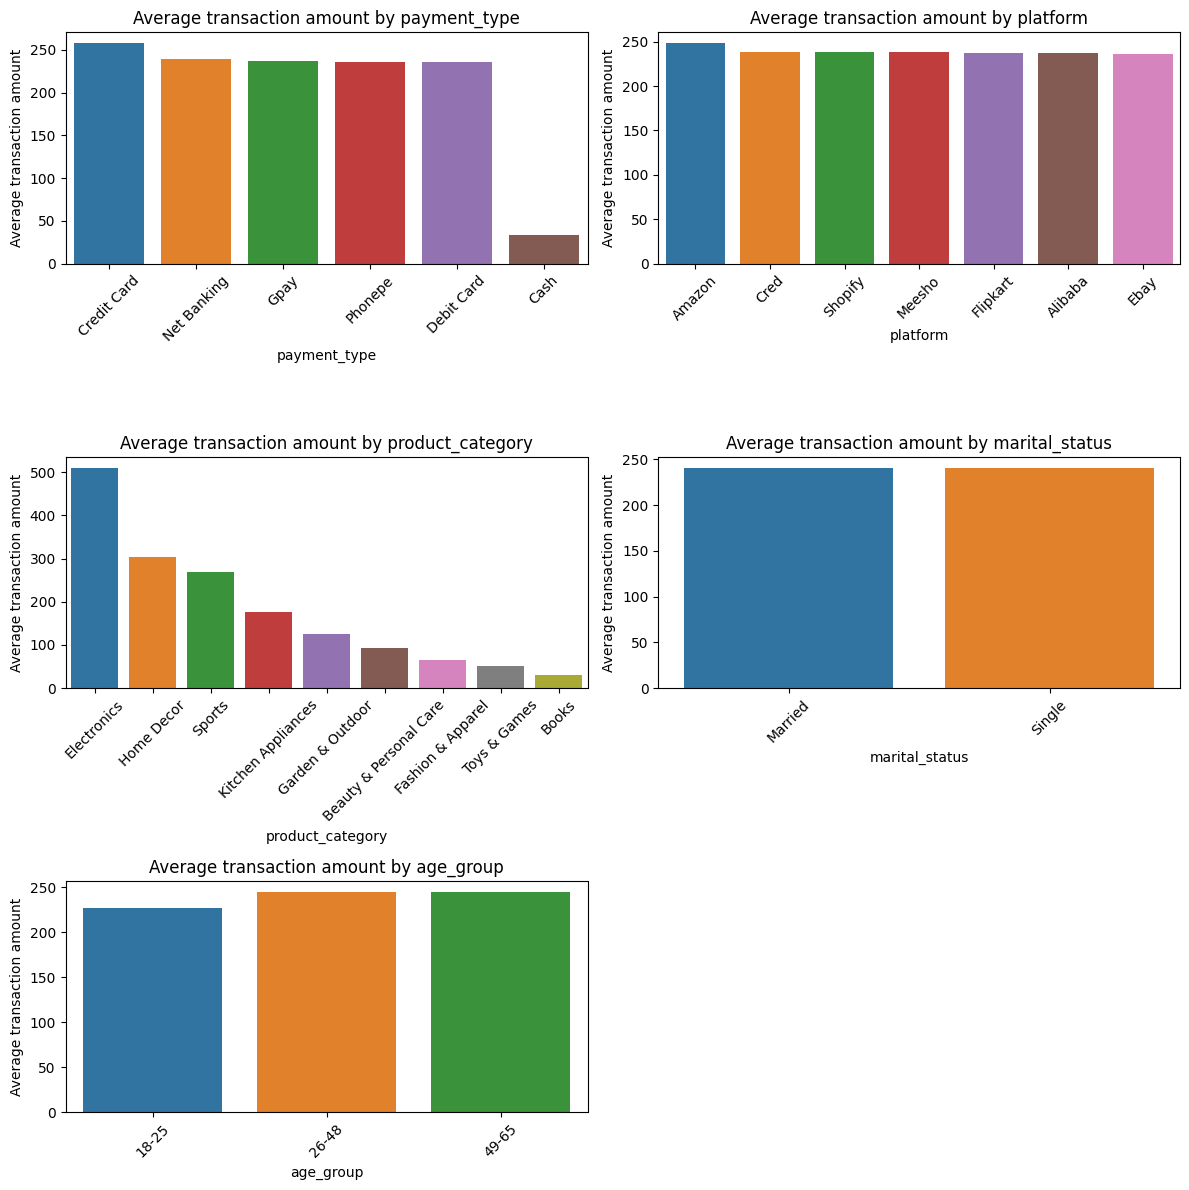

In [756]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [757]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,240.672998
std,144337.711635,288.641924,241.696597
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,64.553463
50%,250000.500000,502.000000,133.000000
75%,375000.250000,752.000000,349.000000
max,500000.000000,1000.000000,999.000000


### Further Analysis On Age Group

Let us do further analysis on age group to figure out their average income, credit limit, credit score etc

In [758]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/3918136653.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()


,age_group,annual_income,credit_limit,credit_score
0,18-25,36347.695833,886.458333,482.216667
1,26-48,145042.013089,20459.424084,597.321117
2,49-65,260165.925134,41699.197861,701.524064


/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/2606875490.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/2606875490.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
/var/folders/pg/1blvyvln3s10cnmv6g7fj5q40000gn/T/ipykernel_73194/2606875490.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplo

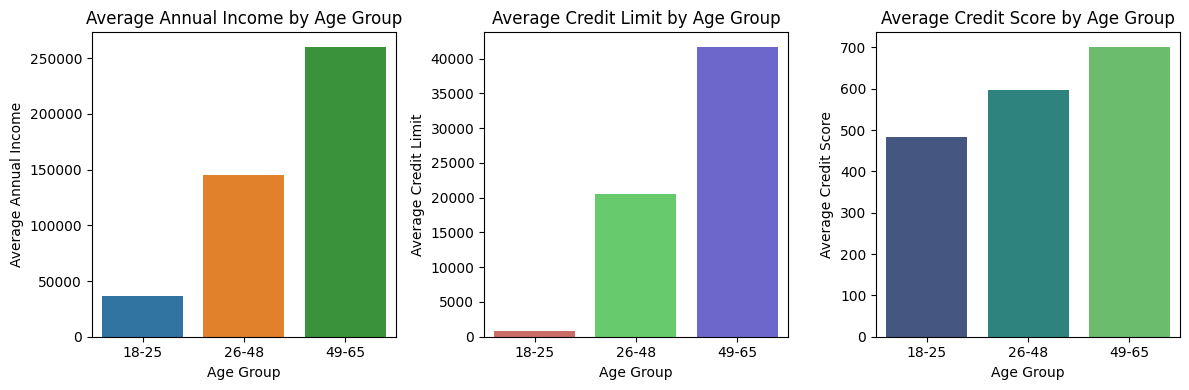

In [759]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

<h2 align="center", style="color:purple">Finalize Target Market For a Trial Credit Card Launch<h2>

#### Targeting Untapped market



1. People with age group of 18 -25 accounts to ~26% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care